In [1]:
import pandas as pd

df = pd.read_csv("resources/spotify_tracks.csv")
print(df.head())

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

In [2]:
columns = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "tempo",
    "valence",
    "popularity"
]

df = df[columns]

df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2000 non-null   float64
 1   energy            2000 non-null   float64
 2   loudness          2000 non-null   float64
 3   speechiness       2000 non-null   float64
 4   acousticness      2000 non-null   float64
 5   instrumentalness  2000 non-null   float64
 6   tempo             2000 non-null   float64
 7   valence           2000 non-null   float64
 8   popularity        2000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 140.8 KB
None


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["popularity"])
y = df["popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", error)

Mean Squared Error: 475.1623466637557


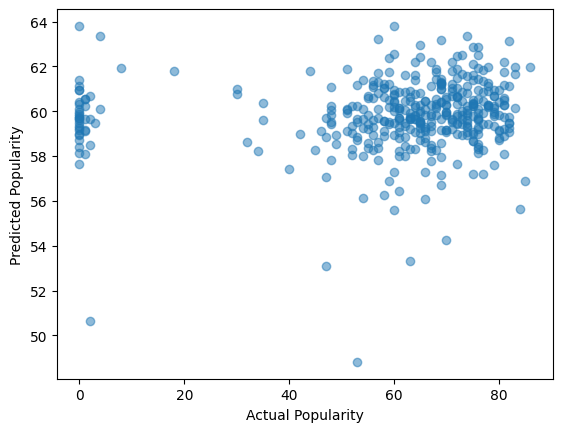

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.show()